In [2]:
import pandas as pd

data = pd.read_csv('C:/Users/Rob/Desktop/Kaggle Projects/data-exercise/data.csv')
data.head()

,trip_id,driver,lon,lat,date,speed,direction,odometer,event
0,1,Alan,-122.128910,37.44529,2009-04-05 13:39:54,11.250,185,743984,N
1,1,Alan,-122.125960,37.44332,2009-04-05 13:40:24,18.750,117,744344,Y
2,1,Alan,-122.128170,37.44071,2009-04-05 13:40:54,38.125,218,744713,N
3,1,Alan,-122.131740,37.43711,2009-04-05 13:41:24,36.250,218,745222,N
4,1,Alan,-122.132805,37.43598,2009-04-05 13:41:54,0.000,218,745380,N



# Q1 

First thing to do is split the data by driver, putting the respective driver into their own dataframe

In [3]:
alan = data[data['driver'] == 'Alan']
barbara = data[data['driver'] == 'Barbara']

Next we can group each dataframe and get the number of times each event occurred in each dataframe

In [4]:
print('Alan: ',alan.groupby('event').size())
print('')
print('Barbara: ',barbara.groupby('event').size())

Alan:  event
N    183
Y     40
dtype: int64

Barbara:  event
N    610
Y     15
dtype: int64


Even though Alan has more 'Y' occurrences, he may be the safer driver due to more driving, hence more opportunities for events.
To check whether this is, or isnt the case, we normalize the data.  To normalize the data, I take the count of the occurences, and divide it by the total number of occurrences

In [5]:
alan_n = alan.groupby('event').size()[0]/(alan.groupby('event').size()).sum()

barbara_n = barbara.groupby('event').size()[0]/(barbara.groupby('event').size()).sum()

print('Percent of times Alan had an \'event\': %.2f' % (1 - alan_n))
print('Percent of times Barbara had an \'event\': %.2f' % (1 - barbara_n))

Percent of times Alan had an 'event': 0.18
Percent of times Barbara had an 'event': 0.02


For the more visual learner, this can be graphed out.

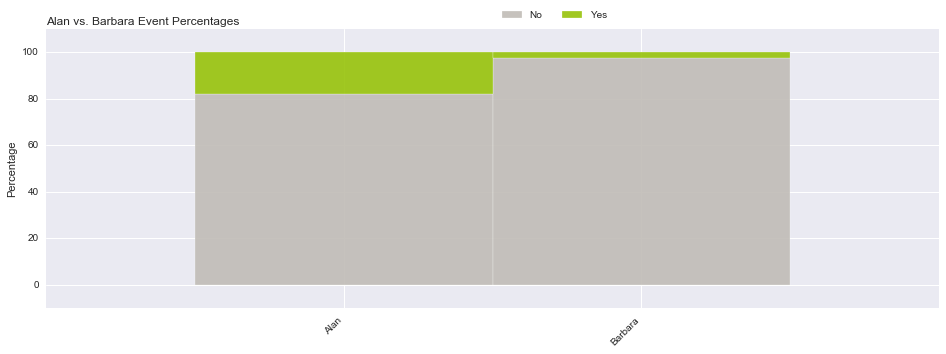

In [33]:
import numpy as np

name_out = np.empty((0,2), int)

name_out = np.vstack((name_out, np.array(alan.groupby('event').size().values.T)))
name_out = np.vstack((name_out, np.array(barbara.groupby('event').size().values.T)))

df = pd.DataFrame(name_out, columns = ['No', 'Yes'])
df['Named'] = ['Alan', 'Barbara']

# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(20,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(df['No']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j for i,j in zip(df['No'], df['Yes'])]

# Create the percentage of the total score the pre_score value for each participant was
ad_rel = [i / j * 100 for  i,j in zip(df['No'], totals)]

# Create the percentage of the total score the mid_score value for each participant was
di_rel = [i / j * 100 for  i,j in zip(df['Yes'], totals)]


# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using pre_rel data
       ad_rel, 
       # labeled 
       label='No', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#C0BCB6',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       di_rel, 
       # with pre_rel
       bottom=ad_rel, 
       # labeled 
       label='Yes', 
       # with alpha
       alpha=0.9, 
       # with color
       color='#97C30A', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )


# Set the ticks to be first names
plt.xticks(tick_pos, df['Named'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(['No', 'Yes'],loc='center left', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.title('Alan vs. Barbara Event Percentages',loc = 'left')
#plt.savefig('/home/ubuntu/dogs_v_cats_outcomes.jpg', bbox_inches = 'tight')
plt.show()

##

**Question 1 Answer**:

Barbara had on average 0.02 events every 30 seconds, as opposed to Alan who had an event 0.18 times every 30 seconds.  Since we assume events as roughly correlated with driver safety we can conclude that Barbara is the safer driver since she had less events on average every 30 seconds.

Other thoughts, I don't believe any of the other columns provide any insight into 'safety' of a driver, speed maybe, but without knowing the legal speed limit of the driver at that time not much can be done.


# Question 2

First thing to do is split the data into trip 7/trip 13


In [6]:
trip_7 = data[data['trip_id'] == 7]
trip_13 = data[data['trip_id'] == 13]

Next, take a quick look at the dataframes, luckily they're small enough to be printed right in the window.

In [7]:
print(trip_7['speed'])
print(trip_13['speed'])

158    40.000
159    38.750
160    53.750
161    59.375
162    64.375
163    65.625
164    28.750
165     0.000
166     0.000
167     0.000
168     8.125
Name: speed, dtype: float64
248    18.750
249     9.375
250     8.125
251    19.375
252    13.125
253    18.750
254    15.000
255    10.625
256     0.000
257     0.000
258     0.000
259     6.250
260    16.250
261     0.000
262     0.000
263     0.000
264     5.625
265    14.375
266    20.000
267     0.000
268     0.000
269     6.250
270     0.000
271     0.000
272     0.000
273    16.875
274     0.000
275    18.125
276     0.000
277     0.000
278    18.750
279    29.375
280    26.250
281    18.125
282    15.625
283    25.000
284     8.125
285    19.375
286    15.000
287    31.250
288    30.625
289    16.875
290    16.250
Name: speed, dtype: float64


Again, for the more visual learners, this is what the trips looked like every 30 seconds

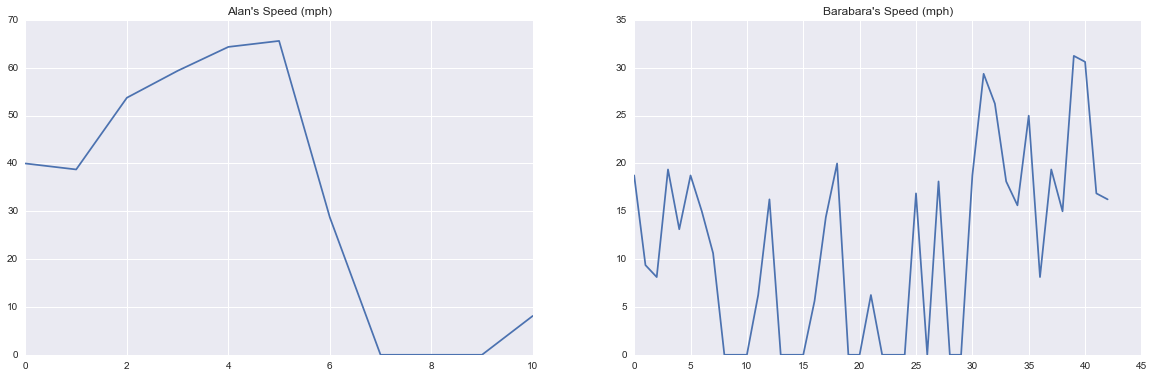

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))
ax1.plot(trip_7.speed.values)
ax1.set_title('Alan\'s Speed (mph)')
ax2.plot(trip_13.speed.values)
ax2.set_title('Barabara\'s Speed (mph)')
plt.show()

Now to perform a quick analysis of the average speed of each trip

In [23]:
import numpy as np

print("Trip 7 Average Speed: %.1f mph" % np.mean(trip_7['speed']))
print("Trip 13 Average Speed: %.1f mph" % np.mean(trip_13['speed']))

Trip 7 Average Speed: 32.6 mph
Trip 13 Average Speed: 11.3 mph


**Question 2 Answer**:

It seems that Alan drove on the highway. This can easily be seen by just observing the data sets, Alan was cruising above 40 mph for a little over three minutes, peaking at 65 mph, then going to 0, perhaps exiting the freeway.  Barbara on the other hand peaked at around 30 mph, a speed that would get you pulled over if being driven on the highway. She also had multiple periods of 0 mph for 30 - 90 seconds at a time, probably indicating she was at a stop light.

Mathematically, Alan averaged a higher speed than Barbara, 32.6 versus 11.3 mph for each trip respectively also suggesting Alan was on the highway for his trip.